# Dataset transfermarket et fifa

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance


In [47]:
df_transfers = pd.read_csv('/home/younes/Projet_machine_learning/archive/transfers.csv')
df_clubs = pd.read_csv('/home/younes/Projet_machine_learning/archive/clubs.csv')
df_games = pd.read_csv('/home/younes/Projet_machine_learning/archive/games.csv')
df_players = pd.read_csv('/home/younes/Projet_machine_learning/archive/players.csv')
df_player_valuation = pd.read_csv('/home/younes/Projet_machine_learning/archive/player_valuations.csv')
df_apparences = pd.read_csv('/home/younes/Projet_machine_learning/archive/appearances.csv')
df_game_lineups = pd.read_csv('/home/younes/Projet_machine_learning/archive/game_lineups.csv')
df_game_events = pd.read_csv('/home/younes/Projet_machine_learning/archive/game_events.csv')
df_competitions = pd.read_csv('/home/younes/Projet_machine_learning/archive/competitions.csv')
df_fifa = pd.read_csv('/home/younes/Projet_machine_learning/archive/fifa_players.csv')









# Preparation des donnes

# Nettoyage des donnees :

In [48]:
colonnes_a_supprimer = [
     'age', 'positions',  'value_euro', 'name','national_team','national_rating',
    'preferred_foot', 'body_type', 'release_clause_euro', 
    'national_team_position', 'national_jersey_number'
]
df_fifa = df_fifa.drop(columns=colonnes_a_supprimer)

In [49]:
print(df_fifa.shape)

(17954, 40)


In [50]:
df_fifa.rename(columns={'full_name': 'name'}, inplace=True)

df_fifa


,name,birth_date,height_cm,weight_kgs,nationality,overall_rating,potential,wage_euro,international_reputation(1-5),weak_foot(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,Lionel Andrés Messi Cuccittini,6/24/1987,170.18,72.1,Argentina,94,94,565000.0,5,4,...,94,48,22,94,94,75,96,33,28,26
1,Christian Dannemann Eriksen,2/14/1992,154.94,76.2,Denmark,88,89,205000.0,3,5,...,89,46,56,84,91,67,88,59,57,22
2,Paul Pogba,3/15/1993,190.50,83.9,France,88,91,255000.0,4,4,...,82,78,64,82,88,82,87,63,67,67
3,Lorenzo Insigne,6/4/1991,162.56,59.0,Italy,88,88,165000.0,3,4,...,84,34,26,83,87,61,83,51,24,22
4,Kalidou Koulibaly,6/20/1991,187.96,88.9,Senegal,88,91,135000.0,3,3,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,Rory McKenzie,10/7/1993,175.26,74.8,Scotland,67,70,3000.0,1,3,...,54,69,41,60,64,63,56,40,20,18
17950,Michal Sipľak,2/2/1996,182.88,79.8,Slovakia,59,67,1000.0,1,3,...,22,62,55,42,39,32,52,53,64,60
17951,Jan Bekkema,4/9/1996,185.42,89.8,Netherlands,59,67,1000.0,1,1,...,9,27,10,5,25,16,47,9,12,13
17952,Abdulrahman Al Yami,6/19/1997,175.26,64.9,Saudi Arabia,59,71,4000.0,1,4,...,58,38,15,54,52,50,53,16,18,17


In [51]:
df_players = df_players[
    [
        "player_id",
        "date_of_birth",
        "name",
        "position",
        "last_season" ,
        "foot",
        "current_club_name",
        "country_of_citizenship",
        "contract_expiration_date",
        "highest_market_value_in_eur",
    ]
]

# Fonction de jointure entre df_fifa et df_players

In [52]:
def match_names(df_players, df_fifa):
    matches = []
    
    for _, player_row in df_players.iterrows():
        name_player = player_row['name']  
        
        matched_row = df_fifa[df_fifa['name'].str.contains(name_player, case=False, na=False)]
        
        if not matched_row.empty:
            for _, row in matched_row.iterrows():
                combined_row = {**player_row.to_dict(), **row.to_dict()}
                matches.append(combined_row)
    
    return pd.DataFrame(matches)


df_merge = match_names(df_players, df_fifa)

print(df_merge.head())


   player_id        date_of_birth                             name  position  \
0         77  1978-05-08 00:00:00  Vinicius Lúcio Julião Morrinhos  Defender   
1         77  1978-05-08 00:00:00    Vinicius Lúcio Trieiro Lobato  Defender   
2         77  1978-05-08 00:00:00   Luisinho Lúcio Conradi Andrade  Defender   
3         77  1978-05-08 00:00:00   Vinicius Lúcio Cardenha Caeiro  Defender   
4       1094  1983-01-16 00:00:00                 Emanuel Pogatetz  Defender   

   last_season  foot       current_club_name country_of_citizenship  \
0         2012   NaN  Juventus Football Club                 Brazil   
1         2012   NaN  Juventus Football Club                 Brazil   
2         2012   NaN  Juventus Football Club                 Brazil   
3         2012   NaN  Juventus Football Club                 Brazil   
4         2013  left          1.FC Nuremberg                Austria   

  contract_expiration_date  highest_market_value_in_eur  ... long_shots  \
0                

In [53]:
df_players = df_merge

# Supprission des Ligne la ou ya des Valeur Null

In [54]:
df_players.dropna(inplace = True )

In [55]:
print(df_players.shape)

(13613, 49)


# One hot encoding pour la colonne position et foot

In [56]:
position_columns = [col for col in df_players.columns if col.startswith('position_')]
df_players = df_players.drop(columns=position_columns)

df_position_encoded = pd.get_dummies(df_players["position"], prefix="position", drop_first=False)

df_players = pd.concat([df_players, df_position_encoded], axis=1)
df_players.head(5)


,player_id,date_of_birth,name,position,last_season,foot,current_club_name,country_of_citizenship,contract_expiration_date,highest_market_value_in_eur,...,vision,penalties,composure,marking,standing_tackle,sliding_tackle,position_Attack,position_Defender,position_Goalkeeper,position_Midfield
450,4042,1982-03-19 00:00:00,Brad Jones,Goalkeeper,2017,left,Feyenoord Rotterdam,Australia,2023-06-30 00:00:00,2000000.0,...,30,35,56,17,13,13,False,False,True,False
580,5023,1978-01-28 00:00:00,Gianluigi Buffon,Goalkeeper,2020,right,Juventus Football Club,Italy,2024-06-30 00:00:00,35000000.0,...,50,22,70,13,11,11,False,False,True,False
627,7161,1992-07-14 00:00:00,Jonas Hofmann,Midfield,2024,right,Bayer 04 Leverkusen Fußball,Germany,2027-06-30 00:00:00,16000000.0,...,77,68,71,49,44,40,False,False,False,True
628,7161,1992-07-14 00:00:00,Jonas Hofmann,Midfield,2024,right,Bayer 04 Leverkusen Fußball,Germany,2027-06-30 00:00:00,16000000.0,...,63,40,53,62,63,58,False,False,False,True
632,7449,1985-07-26 00:00:00,Gaël Clichy,Defender,2019,left,İstanbul Başakşehir Futbol Kulübü,France,2023-06-30 00:00:00,16000000.0,...,59,45,73,74,77,75,False,True,False,False


In [57]:
foot_columns = [col for col in df_players.columns if col.startswith('foot_')]
df_players = df_players.drop(columns=foot_columns)
df_foot_encoded = pd.get_dummies(df_players['foot'], prefix='foot', drop_first=False)
df_players = pd.concat([df_players, df_foot_encoded], axis=1)
print(df_players.head())


     player_id        date_of_birth              name    position  \
450       4042  1982-03-19 00:00:00        Brad Jones  Goalkeeper   
580       5023  1978-01-28 00:00:00  Gianluigi Buffon  Goalkeeper   
627       7161  1992-07-14 00:00:00     Jonas Hofmann    Midfield   
628       7161  1992-07-14 00:00:00     Jonas Hofmann    Midfield   
632       7449  1985-07-26 00:00:00       Gaël Clichy    Defender   

     last_season   foot                  current_club_name  \
450         2017   left                Feyenoord Rotterdam   
580         2020  right             Juventus Football Club   
627         2024  right        Bayer 04 Leverkusen Fußball   
628         2024  right        Bayer 04 Leverkusen Fußball   
632         2019   left  İstanbul Başakşehir Futbol Kulübü   

    country_of_citizenship contract_expiration_date  \
450              Australia      2023-06-30 00:00:00   
580                  Italy      2024-06-30 00:00:00   
627                Germany      2027-06-30 00:0

In [58]:
df_players = df_players.replace({True : 1, False : 0 })


/tmp/ipykernel_6891/623335698.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_players = df_players.replace({True : 1, False : 0 })


# Creation de la colonne age 

In [59]:
df_players['date_of_birth'] = pd.to_datetime(df_players['date_of_birth'])

current_year = pd.to_datetime('now').year
df_players['age'] = current_year - df_players['date_of_birth'].dt.year




In [60]:
df_players

,player_id,date_of_birth,name,position,last_season,foot,current_club_name,country_of_citizenship,contract_expiration_date,highest_market_value_in_eur,...,standing_tackle,sliding_tackle,position_Attack,position_Defender,position_Goalkeeper,position_Midfield,foot_both,foot_left,foot_right,age
450,4042,1982-03-19,Brad Jones,Goalkeeper,2017,left,Feyenoord Rotterdam,Australia,2023-06-30 00:00:00,2000000.0,...,13,13,0,0,1,0,0,1,0,42
580,5023,1978-01-28,Gianluigi Buffon,Goalkeeper,2020,right,Juventus Football Club,Italy,2024-06-30 00:00:00,35000000.0,...,11,11,0,0,1,0,0,0,1,46
627,7161,1992-07-14,Jonas Hofmann,Midfield,2024,right,Bayer 04 Leverkusen Fußball,Germany,2027-06-30 00:00:00,16000000.0,...,44,40,0,0,0,1,0,0,1,32
628,7161,1992-07-14,Jonas Hofmann,Midfield,2024,right,Bayer 04 Leverkusen Fußball,Germany,2027-06-30 00:00:00,16000000.0,...,63,58,0,0,0,1,0,0,1,32
632,7449,1985-07-26,Gaël Clichy,Defender,2019,left,İstanbul Başakşehir Futbol Kulübü,France,2023-06-30 00:00:00,16000000.0,...,77,75,0,1,0,0,0,1,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,1159449,2006-09-15,Samuel Sáiz Alonso,Attack,2024,right,Casa Pia Atlético Clube,Portugal,2026-06-30 00:00:00,100000.0,...,30,14,1,0,0,0,0,0,1,18
23993,1159449,2006-09-15,Joel Nathaniel Campbell Samuels,Attack,2024,right,Casa Pia Atlético Clube,Portugal,2026-06-30 00:00:00,100000.0,...,40,42,1,0,0,0,0,0,1,18
23994,1159449,2006-09-15,Samuel Gigot,Attack,2024,right,Casa Pia Atlético Clube,Portugal,2026-06-30 00:00:00,100000.0,...,73,75,1,0,0,0,0,0,1,18
23995,1159449,2006-09-15,Samuel Umtiti,Attack,2024,right,Casa Pia Atlético Clube,Portugal,2026-06-30 00:00:00,100000.0,...,89,86,1,0,0,0,0,0,1,18


In [61]:
print(df_players.head(20))


     player_id date_of_birth                                 name    position  \
450       4042    1982-03-19                           Brad Jones  Goalkeeper   
580       5023    1978-01-28                     Gianluigi Buffon  Goalkeeper   
627       7161    1992-07-14                        Jonas Hofmann    Midfield   
628       7161    1992-07-14                        Jonas Hofmann    Midfield   
632       7449    1985-07-26                          Gaël Clichy    Defender   
657       7600    1984-05-11                 Andrés Iniesta Luján    Midfield   
811       8198    1985-02-05  Cristiano Ronaldo dos Santos Aveiro      Attack   
812       8246    1985-05-01                       Philipp Pentke  Goalkeeper   
813       8421    1986-01-02                     Michael Jakobsen    Defender   
816       8806    1987-05-04            Francesc Fàbregas i Soler    Midfield   
826       9915    1986-01-16                         Reto Ziegler    Defender   
830      10143    1983-03-15

In [62]:
df_players = df_players.drop(columns=['contract_expiration_date'])

In [63]:
df_players


,player_id,date_of_birth,name,position,last_season,foot,current_club_name,country_of_citizenship,highest_market_value_in_eur,birth_date,...,standing_tackle,sliding_tackle,position_Attack,position_Defender,position_Goalkeeper,position_Midfield,foot_both,foot_left,foot_right,age
450,4042,1982-03-19,Brad Jones,Goalkeeper,2017,left,Feyenoord Rotterdam,Australia,2000000.0,3/19/1982,...,13,13,0,0,1,0,0,1,0,42
580,5023,1978-01-28,Gianluigi Buffon,Goalkeeper,2020,right,Juventus Football Club,Italy,35000000.0,1/28/1978,...,11,11,0,0,1,0,0,0,1,46
627,7161,1992-07-14,Jonas Hofmann,Midfield,2024,right,Bayer 04 Leverkusen Fußball,Germany,16000000.0,7/14/1992,...,44,40,0,0,0,1,0,0,1,32
628,7161,1992-07-14,Jonas Hofmann,Midfield,2024,right,Bayer 04 Leverkusen Fußball,Germany,16000000.0,2/7/1997,...,63,58,0,0,0,1,0,0,1,32
632,7449,1985-07-26,Gaël Clichy,Defender,2019,left,İstanbul Başakşehir Futbol Kulübü,France,16000000.0,7/26/1985,...,77,75,0,1,0,0,0,1,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,1159449,2006-09-15,Samuel Sáiz Alonso,Attack,2024,right,Casa Pia Atlético Clube,Portugal,100000.0,1/22/1991,...,30,14,1,0,0,0,0,0,1,18
23993,1159449,2006-09-15,Joel Nathaniel Campbell Samuels,Attack,2024,right,Casa Pia Atlético Clube,Portugal,100000.0,6/26/1992,...,40,42,1,0,0,0,0,0,1,18
23994,1159449,2006-09-15,Samuel Gigot,Attack,2024,right,Casa Pia Atlético Clube,Portugal,100000.0,10/12/1993,...,73,75,1,0,0,0,0,0,1,18
23995,1159449,2006-09-15,Samuel Umtiti,Attack,2024,right,Casa Pia Atlético Clube,Portugal,100000.0,11/14/1993,...,89,86,1,0,0,0,0,0,1,18


# Jointure df_player_valuation evec df_players

In [64]:
df_player_valuation= df_player_valuation[
    ['player_id', 'date', 'market_value_in_eur', 'current_club_id']
]


In [65]:
print(df_player_valuation.head(5))

   player_id        date  market_value_in_eur  current_club_id
0     405973  2000-01-20               150000             3057
1     342216  2001-07-20               100000             1241
2       3132  2003-12-09               400000              126
3       6893  2003-12-15               900000              984
4         10  2004-10-04              7000000              398


In [66]:
print(df_players.shape)
print(df_player_valuation.shape)
df_player_valuation = df_player_valuation.dropna()


(13613, 56)
(487953, 4)


In [67]:

df_merged = pd.merge(df_players, df_player_valuation, on='player_id', how='inner')

print(df_merged.head())
print(df_merged.shape)

   player_id date_of_birth        name    position  last_season  foot  \
0       4042    1982-03-19  Brad Jones  Goalkeeper         2017  left   
1       4042    1982-03-19  Brad Jones  Goalkeeper         2017  left   
2       4042    1982-03-19  Brad Jones  Goalkeeper         2017  left   
3       4042    1982-03-19  Brad Jones  Goalkeeper         2017  left   
4       4042    1982-03-19  Brad Jones  Goalkeeper         2017  left   

     current_club_name country_of_citizenship  highest_market_value_in_eur  \
0  Feyenoord Rotterdam              Australia                    2000000.0   
1  Feyenoord Rotterdam              Australia                    2000000.0   
2  Feyenoord Rotterdam              Australia                    2000000.0   
3  Feyenoord Rotterdam              Australia                    2000000.0   
4  Feyenoord Rotterdam              Australia                    2000000.0   

  birth_date  ...  position_Defender  position_Goalkeeper position_Midfield  \
0  3/19/1982 

In [68]:
df_merged['date'] = pd.to_datetime(df_merged['date'], errors='coerce')
df_merged['date'] = df_merged['date'].dt.year.fillna(1900).astype(int)


In [69]:
df_merged = df_merged.rename(columns={'date': 'date_valuation'})

In [70]:
df_merged = df_merged.drop_duplicates()

# Netoyage et enrichissement et jointure df_appearances

In [72]:
df_appearances = df_apparences[[
    'player_id', 'date', 'competition_id', 
    'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'
]]


# Filtrage des donnees (que les grand championnat)

In [73]:
pays_a_filtrer = [
    'Italy', 'Netherlands', 'Portugal', 'Spain', 
    'France', 'Belgium', 'England', 'Germany'
]

competition_ids = df_competitions[df_competitions['country_name'].isin(pays_a_filtrer)]['competition_id'].unique().tolist()

df_appearances = df_appearances[df_appearances['competition_id'].isin(competition_ids)]


# Enrichissement de la df_appearance 

In [74]:
df_appearances['date'] = pd.to_datetime(df_appearances['date'])
df_appearances['year'] = df_appearances['date'].dt.year

aggregated_data = df_appearances.groupby(['player_id', 'year']).agg(
    total_goals=('goals', 'sum'),
    total_minutes_played=('minutes_played', 'sum'),
    total_assists=('assists', 'sum'),
    total_yellow_cards=('yellow_cards', 'sum'),
    total_red_cards=('red_cards', 'sum')
).reset_index()

df_appearances = pd.merge(df_appearances, aggregated_data, on=['player_id', 'year'], how='left')

print(df_appearances.head(10))


   player_id       date competition_id  yellow_cards  red_cards  goals  \
0     110668 2012-07-22           BESC             0          0      0   
1      12518 2012-07-22           BESC             0          0      0   
2     129580 2012-07-22           BESC             0          0      0   
3     129588 2012-07-22           BESC             0          0      1   
4      12974 2012-07-22           BESC             0          0      0   
5      13292 2012-07-22           BESC             0          0      0   
6      14933 2012-07-22           BESC             0          0      0   
7      16947 2012-07-22           BESC             0          0      0   
8     187744 2012-07-22           BESC             0          0      0   
9      18807 2012-07-22           BESC             0          0      0   

   assists  minutes_played  year  total_goals  total_minutes_played  \
0        0              90  2012            0                  1959   
1        0              90  2012           

# Colonne Ratio minute jouer par goal/assist/redcard/yellowcard



In [76]:
df_appearances['minutes_per_goal'] = (
    df_appearances['total_minutes_played'] / df_appearances['total_goals'].replace(0, 1)
)
df_appearances['minutes_per_assist'] = (
    df_appearances['total_minutes_played'] / df_appearances['total_assists'].replace(0, 1)
)
df_appearances['minutes_per_yellow_card'] = (
    df_appearances['total_minutes_played'] / df_appearances['total_yellow_cards'].replace(0, 1)
)
df_appearances['minutes_per_red_card'] = (
    df_appearances['total_minutes_played'] / df_appearances['total_red_cards'].replace(0, 1)
)



In [77]:
df_appearances


,player_id,date,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,year,total_goals,total_minutes_played,total_assists,total_yellow_cards,total_red_cards,minutes_per_goal,minutes_per_assist,minutes_per_yellow_card,minutes_per_red_card
0,110668,2012-07-22,BESC,0,0,0,0,90,2012,0,1959,1,5,1,1959.000000,1959.00,391.8,1959.0
1,12518,2012-07-22,BESC,0,0,0,0,90,2012,0,1980,0,3,0,1980.000000,1980.00,660.0,1980.0
2,129580,2012-07-22,BESC,0,0,0,0,12,2012,0,17,0,0,0,17.000000,17.00,17.0,17.0
3,129588,2012-07-22,BESC,0,0,1,0,61,2012,3,973,4,0,0,324.333333,243.25,973.0,973.0
4,12974,2012-07-22,BESC,0,0,0,0,90,2012,0,2070,1,5,0,2070.000000,2070.00,414.0,2070.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005356,710004,2024-11-26,CDR,0,0,1,0,90,2024,1,966,1,1,0,966.000000,966.00,966.0,966.0
1005357,841121,2024-11-26,CDR,0,0,0,0,90,2024,0,96,0,0,0,96.000000,96.00,96.0,96.0
1005358,908621,2024-11-26,CDR,1,0,0,0,27,2024,0,471,0,2,0,471.000000,471.00,235.5,471.0
1005359,941869,2024-11-26,CDR,0,0,0,0,90,2024,1,957,0,5,0,957.000000,957.00,191.4,957.0


In [78]:
print(df_appearances.shape)

(1005361, 18)


# Suprission des colonne total goal .... (corrélation)

In [79]:
columns_to_keep = ['player_id', 'year',  
                   'total_minutes_played',  
                   'minutes_per_goal', 'minutes_per_assist', 
                   'minutes_per_yellow_card', 'minutes_per_red_card']

df_appearances_optimized = df_appearances[columns_to_keep]
print("Valeur maximale des buts totaux (total_goals) :", max_goals)

print(df_appearances_optimized.head(1))


Valeur maximale des buts totaux (total_goals) : 46
   player_id  year  total_minutes_played  minutes_per_goal  \
0     110668  2012                  1959            1959.0   

   minutes_per_assist  minutes_per_yellow_card  minutes_per_red_card  
0              1959.0                    391.8                1959.0  


In [80]:
df_appearances_optimized = df_appearances_optimized.drop_duplicates()

In [81]:
df_appearances_optimized

,player_id,year,total_minutes_played,minutes_per_goal,minutes_per_assist,minutes_per_yellow_card,minutes_per_red_card
0,110668,2012,1959,1959.000000,1959.00,391.8,1959.0
1,12518,2012,1980,1980.000000,1980.00,660.0,1980.0
2,129580,2012,17,17.000000,17.00,17.0,17.0
3,129588,2012,973,324.333333,243.25,973.0,973.0
4,12974,2012,2070,2070.000000,2070.00,414.0,2070.0
...,...,...,...,...,...,...,...
1004969,1004723,2024,12,12.000000,12.00,12.0,12.0
1005091,631927,2024,12,12.000000,12.00,12.0,12.0
1005323,488996,2024,12,12.000000,12.00,12.0,12.0
1005327,566613,2024,1,1.000000,1.00,1.0,1.0


In [82]:
df_merged.head

<bound method NDFrame.head of         player_id date_of_birth           name    position  last_season  \
0            4042    1982-03-19     Brad Jones  Goalkeeper         2017   
1            4042    1982-03-19     Brad Jones  Goalkeeper         2017   
2            4042    1982-03-19     Brad Jones  Goalkeeper         2017   
3            4042    1982-03-19     Brad Jones  Goalkeeper         2017   
4            4042    1982-03-19     Brad Jones  Goalkeeper         2017   
...           ...           ...            ...         ...          ...   
270856    1159449    2006-09-15  Samuel Umtiti      Attack         2024   
270858    1159449    2006-09-15  Samuel Umtiti      Attack         2024   
270859    1178474    2005-05-14   Mamadou Koné    Midfield         2024   
270860    1178474    2005-05-14   Mamadou Koné    Midfield         2024   
270861    1178474    2005-05-14   Mamadou Koné    Midfield         2024   

         foot        current_club_name country_of_citizenship  \
0   

# Jointure final 

In [175]:

df_final = pd.merge(
    df_appearances_optimized,
    df_merged,
    left_on=['player_id', 'year'],
    right_on=['player_id', 'date_valuation'],
    how='inner'  
)



In [176]:
print(df_final.shape)

(91559, 65)


In [177]:
df_final

,player_id,year,total_minutes_played,minutes_per_goal,minutes_per_assist,minutes_per_yellow_card,minutes_per_red_card,date_of_birth,name,position,last_season,foot,current_club_name,country_of_citizenship,highest_market_value_in_eur,birth_date,height_cm,weight_kgs,nationality,overall_rating,potential,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,position_Attack,position_Defender,position_Goalkeeper,position_Midfield,foot_both,foot_left,foot_right,age,date_valuation,market_value_in_eur,current_club_id
0,129588,2012,973,324.333333,243.250000,973.0,973.0,1994-05-14,Dennis Praet,Midfield,2024,right,Royal Antwerp Football Club,Belgium,25000000.0,5/14/1994,154.94,78.0,Belgium,76,81,28000.0,2,4,4,74,66,62,81,70,78,74,67,77,78,73,69,76,72,71,72,66,71,64,75,64,60,75,75,56,74,56,62,58,0,0,0,1,0,0,1,30,2012,700000,1096
1,129588,2012,973,324.333333,243.250000,973.0,973.0,1994-05-14,Dennis Praet,Midfield,2024,right,Royal Antwerp Football Club,Belgium,25000000.0,5/14/1994,154.94,78.0,Belgium,76,81,28000.0,2,4,4,74,66,62,81,70,78,74,67,77,78,73,69,76,72,71,72,66,71,64,75,64,60,75,75,56,74,56,62,58,0,0,0,1,0,0,1,30,2012,1000000,1096
2,129588,2012,973,324.333333,243.250000,973.0,973.0,1994-05-14,Dennis Praet,Midfield,2024,right,Royal Antwerp Football Club,Belgium,25000000.0,5/14/1994,154.94,78.0,Belgium,76,81,28000.0,2,4,4,74,66,62,81,70,78,74,67,77,78,73,69,76,72,71,72,66,71,64,75,64,60,75,75,56,74,56,62,58,0,0,0,1,0,0,1,30,2012,2500000,1096
3,59641,2012,553,553.000000,184.333333,276.5,553.0,1988-05-27,Denis Odoi,Defender,2024,right,Royal Antwerp Football Club,Ghana,2500000.0,5/27/1988,152.40,72.1,Belgium,69,69,22000.0,1,3,3,64,39,61,71,49,71,59,59,64,68,78,85,84,68,73,62,85,66,64,54,71,68,62,59,49,77,65,70,66,0,1,0,0,0,0,1,36,2012,2000000,1096
4,73912,2012,1156,385.333333,231.200000,578.0,1156.0,1987-09-23,Hal Robson-Kanu,Midfield,2018,left,Koninklijke Voetbalclub Kortrijk,Brazil,2500000.0,5/21/1989,182.88,83.0,Wales,68,68,15000.0,1,3,3,68,68,57,63,65,71,61,35,57,68,65,76,58,63,58,69,62,69,75,68,76,32,66,59,72,59,31,35,27,0,0,0,1,0,1,0,37,2012,1000000,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91554,817665,2024,22,22.000000,22.000000,22.0,22.0,2004-01-02,Pablo Sarabia García,Attack,2024,right,Gil Vicente Futebol Clube,Brazil,500000.0,5/11/1992,175.26,69.9,Spain,83,84,28000.0,2,4,4,84,78,61,83,64,86,84,74,79,85,75,76,80,77,81,76,40,72,58,77,46,55,82,84,69,74,57,54,49,1,0,0,0,0,0,1,20,2024,400000,2424
91555,454386,2024,97,97.000000,97.000000,97.0,97.0,2000-11-24,Adrian Benedyczak,Attack,2024,both,Parma Calcio 1913,Poland,6000000.0,11/24/2000,187.96,81.2,Poland,55,73,1000.0,1,3,2,25,54,63,45,41,49,28,25,23,52,58,59,55,48,51,55,65,64,78,45,49,16,52,47,56,42,33,24,24,1,0,0,0,1,0,0,24,2024,6000000,130
91556,193256,2024,45,45.000000,45.000000,45.0,45.0,1993-04-23,Gauthier Gallon,Goalkeeper,2024,right,Stade Rennais Football Club,France,2500000.0,4/23/1993,185.42,78.9,France,68,72,2000.0,1,2,1,12,14,13,29,16,17,15,19,27,18,40,40,38,61,54,20,59,29,64,15,25,22,20,15,19,55,12,16,13,0,0,1,0,0,0,1,31,2024,1200000,273
91557,365172,2024,11,11.000000,11.000000,11.0,11.0,1998-10-09,Patson Daka,Attack,2024,right,Leicester City Football Club,Zambia,22000000.0,10/9/1998,182.88,71.2,Zambia,69,86,9000.0,1,3,3,34,68,57,62,58,69,61,35,51,67,87,91,79,70,68,72,67,78,70,63,63,17,65,53,60,53,18,24,16,1,0,0,0,0,0,1,26,2024,12000000,1003


In [178]:
pd.set_option('display.max_columns', None) 

In [179]:
print(df_final.columns)

Index(['player_id', 'year', 'total_minutes_played', 'minutes_per_goal',
       'minutes_per_assist', 'minutes_per_yellow_card', 'minutes_per_red_card',
       'date_of_birth', 'name', 'position', 'last_season', 'foot',
       'current_club_name', 'country_of_citizenship',
       'highest_market_value_in_eur', 'birth_date', 'height_cm', 'weight_kgs',
       'nationality', 'overall_rating', 'potential', 'wage_euro',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'position_Attack', 'position_Defender', 'positio

In [180]:
print(df_final['player_id'].isnull().sum())



0


# actualiser la colonne highest market value(eviter la fuite de donnees)

In [181]:
df_upto_2023 = df_final[df_final['year'] <= 2023]

max_market_value_upto_2023 = (
    df_upto_2023.groupby('player_id')['market_value_in_eur'].transform('max')
)

df_final['highest_market_value_in_eur'] = (
    df_final.merge(
        df_upto_2023.groupby('player_id')['market_value_in_eur'].max(),
        on='player_id',
        how='left',
        suffixes=('', '_max_upto_2023')
    )['market_value_in_eur_max_upto_2023']
)

print(df_final[['player_id', 'year', 'market_value_in_eur', 'highest_market_value_in_eur']].head())


   player_id  year  market_value_in_eur  highest_market_value_in_eur
0     129588  2012               700000                   25000000.0
1     129588  2012              1000000                   25000000.0
2     129588  2012              2500000                   25000000.0
3      59641  2012              2000000                    2500000.0
4      73912  2012              1000000                    2500000.0


In [182]:
print(df_final.head(1))

   player_id  year  total_minutes_played  minutes_per_goal  \
0     129588  2012                   973        324.333333   

   minutes_per_assist  minutes_per_yellow_card  minutes_per_red_card  \
0              243.25                    973.0                 973.0   

  date_of_birth          name  position  last_season   foot  \
0    1994-05-14  Dennis Praet  Midfield         2024  right   

             current_club_name country_of_citizenship  \
0  Royal Antwerp Football Club                Belgium   

   highest_market_value_in_eur birth_date  height_cm  weight_kgs nationality  \
0                   25000000.0  5/14/1994     154.94        78.0     Belgium   

   overall_rating  potential  wage_euro  international_reputation(1-5)  \
0              76         81    28000.0                              2   

   weak_foot(1-5)  skill_moves(1-5)  crossing  finishing  heading_accuracy  \
0               4                 4        74         66                62   

   short_passing  vol

# Etape que jai supprimé (Fuite de donnees et filtre non necessaire

In [183]:
 ##df_final['market_value_club'] = df_final.groupby(['current_club_name', 'year'])['market_value_in_eur'].transform('sum')



In [184]:
## df_selected['value_to_club_ratio'] = df_selected['market_value_in_eur'] / df_selected['market_value_club']


In [185]:

df_selected = df_final

In [186]:
df_selected.head

<bound method NDFrame.head of        player_id  year  total_minutes_played  minutes_per_goal  \
0         129588  2012                   973        324.333333   
1         129588  2012                   973        324.333333   
2         129588  2012                   973        324.333333   
3          59641  2012                   553        553.000000   
4          73912  2012                  1156        385.333333   
...          ...   ...                   ...               ...   
91554     817665  2024                    22         22.000000   
91555     454386  2024                    97         97.000000   
91556     193256  2024                    45         45.000000   
91557     365172  2024                    11         11.000000   
91558     631927  2024                    12         12.000000   

       minutes_per_assist  minutes_per_yellow_card  minutes_per_red_card  \
0              243.250000                    973.0                 973.0   
1              243.250000

In [187]:
##df_selected = df_selected.sort_values(by='market_value_club', ascending=False)

##df_selected = df_selected.head(int(len(df_selected) * 0.5))



In [188]:
print(df_selected.shape)

(91559, 65)


In [189]:
##from sklearn.preprocessing import StandardScaler

##scaler = StandardScaler()
##df_selected[['value_to_club_ratio', 'market_value_club']] = scaler.fit_transform(
##    df_selected[['value_to_club_ratio', 'market_value_club']]
##)


# Nationality frequency (baisse du score a exclure )

In [190]:
##nationality_frequency = df_selected['nationality'].value_counts()

##df_selected['nationality_frequency'] = df_selected['nationality'].map(nationality_frequency)

## print(df_selected[['nationality', 'nationality_frequency']].head())


In [191]:
df_selected

,player_id,year,total_minutes_played,minutes_per_goal,minutes_per_assist,minutes_per_yellow_card,minutes_per_red_card,date_of_birth,name,position,last_season,foot,current_club_name,country_of_citizenship,highest_market_value_in_eur,birth_date,height_cm,weight_kgs,nationality,overall_rating,potential,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,position_Attack,position_Defender,position_Goalkeeper,position_Midfield,foot_both,foot_left,foot_right,age,date_valuation,market_value_in_eur,current_club_id
0,129588,2012,973,324.333333,243.250000,973.0,973.0,1994-05-14,Dennis Praet,Midfield,2024,right,Royal Antwerp Football Club,Belgium,25000000.0,5/14/1994,154.94,78.0,Belgium,76,81,28000.0,2,4,4,74,66,62,81,70,78,74,67,77,78,73,69,76,72,71,72,66,71,64,75,64,60,75,75,56,74,56,62,58,0,0,0,1,0,0,1,30,2012,700000,1096
1,129588,2012,973,324.333333,243.250000,973.0,973.0,1994-05-14,Dennis Praet,Midfield,2024,right,Royal Antwerp Football Club,Belgium,25000000.0,5/14/1994,154.94,78.0,Belgium,76,81,28000.0,2,4,4,74,66,62,81,70,78,74,67,77,78,73,69,76,72,71,72,66,71,64,75,64,60,75,75,56,74,56,62,58,0,0,0,1,0,0,1,30,2012,1000000,1096
2,129588,2012,973,324.333333,243.250000,973.0,973.0,1994-05-14,Dennis Praet,Midfield,2024,right,Royal Antwerp Football Club,Belgium,25000000.0,5/14/1994,154.94,78.0,Belgium,76,81,28000.0,2,4,4,74,66,62,81,70,78,74,67,77,78,73,69,76,72,71,72,66,71,64,75,64,60,75,75,56,74,56,62,58,0,0,0,1,0,0,1,30,2012,2500000,1096
3,59641,2012,553,553.000000,184.333333,276.5,553.0,1988-05-27,Denis Odoi,Defender,2024,right,Royal Antwerp Football Club,Ghana,2500000.0,5/27/1988,152.40,72.1,Belgium,69,69,22000.0,1,3,3,64,39,61,71,49,71,59,59,64,68,78,85,84,68,73,62,85,66,64,54,71,68,62,59,49,77,65,70,66,0,1,0,0,0,0,1,36,2012,2000000,1096
4,73912,2012,1156,385.333333,231.200000,578.0,1156.0,1987-09-23,Hal Robson-Kanu,Midfield,2018,left,Koninklijke Voetbalclub Kortrijk,Brazil,2500000.0,5/21/1989,182.88,83.0,Wales,68,68,15000.0,1,3,3,68,68,57,63,65,71,61,35,57,68,65,76,58,63,58,69,62,69,75,68,76,32,66,59,72,59,31,35,27,0,0,0,1,0,1,0,37,2012,1000000,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91554,817665,2024,22,22.000000,22.000000,22.0,22.0,2004-01-02,Pablo Sarabia García,Attack,2024,right,Gil Vicente Futebol Clube,Brazil,500000.0,5/11/1992,175.26,69.9,Spain,83,84,28000.0,2,4,4,84,78,61,83,64,86,84,74,79,85,75,76,80,77,81,76,40,72,58,77,46,55,82,84,69,74,57,54,49,1,0,0,0,0,0,1,20,2024,400000,2424
91555,454386,2024,97,97.000000,97.000000,97.0,97.0,2000-11-24,Adrian Benedyczak,Attack,2024,both,Parma Calcio 1913,Poland,NaN,11/24/2000,187.96,81.2,Poland,55,73,1000.0,1,3,2,25,54,63,45,41,49,28,25,23,52,58,59,55,48,51,55,65,64,78,45,49,16,52,47,56,42,33,24,24,1,0,0,0,1,0,0,24,2024,6000000,130
91556,193256,2024,45,45.000000,45.000000,45.0,45.0,1993-04-23,Gauthier Gallon,Goalkeeper,2024,right,Stade Rennais Football Club,France,2500000.0,4/23/1993,185.42,78.9,France,68,72,2000.0,1,2,1,12,14,13,29,16,17,15,19,27,18,40,40,38,61,54,20,59,29,64,15,25,22,20,15,19,55,12,16,13,0,0,1,0,0,0,1,31,2024,1200000,273
91557,365172,2024,11,11.000000,11.000000,11.0,11.0,1998-10-09,Patson Daka,Attack,2024,right,Leicester City Football Club,Zambia,22000000.0,10/9/1998,182.88,71.2,Zambia,69,86,9000.0,1,3,3,34,68,57,62,58,69,61,35,51,67,87,91,79,70,68,72,67,78,70,63,63,17,65,53,60,53,18,24,16,1,0,0,0,0,0,1,26,2024,12000000,1003


In [192]:
print(df_selected.shape)

(91559, 65)


# Derniere preparation supprission des colonne et standarisation

In [193]:
df_selected= df_selected.drop(columns=['position'])

df_selected= df_selected.drop(columns=['foot'])


In [194]:
df_selected.drop(columns=['nationality'], inplace=True)


In [195]:
df_selected.drop(columns=['country_of_citizenship'], inplace=True)


In [196]:
df_selected.drop(columns=['current_club_name'], inplace=True)


In [197]:
df_selected.drop(columns=['current_club_id'], inplace=True)


In [198]:
df_selected.drop(columns=['date_of_birth'], inplace=True)



In [199]:
df_selected.drop(columns=['name'], inplace=True)


In [200]:
df_selected.drop(columns=['player_id'], inplace=True)


In [201]:
df_selected.drop(columns=['birth_date'], inplace=True)


In [202]:
df_selected.drop(columns=['last_season'], inplace=True)


# Colonne standarisé avec log

In [203]:
columns_to_transform = ['total_minutes_played', 'minutes_per_goal', 'minutes_per_assist', 
                        'minutes_per_yellow_card', 'minutes_per_red_card']

df_selected[columns_to_transform] = df_selected[columns_to_transform].apply(np.log)


In [204]:
df_selected['wage_euro'] = df_selected['wage_euro'].apply(np.log)


In [205]:
df_selected['highest_market_value_in_eur'] = df_selected['highest_market_value_in_eur'].apply(np.log)


In [206]:
##df_selected['nationality_frequency'] = df_selected['nationality_frequency'].apply(np.log)


In [207]:
same_values = (df_selected['date_valuation'] == df_selected['year']).all()

if same_values:
    print("Les colonnes 'date_valuation' et 'year' ont les mêmes valeurs pour toutes les lignes.")
else:
    print("Les colonnes 'date_valuation' et 'year' n'ont pas les mêmes valeurs pour toutes les lignes.")


Les colonnes 'date_valuation' et 'year' ont les mêmes valeurs pour toutes les lignes.


In [208]:
current_year = pd.to_datetime('today').year

df_selected['date_valuation'] = current_year - df_selected['date_valuation']



In [209]:
##df_selected.drop(columns=['market_value_club'], inplace=True)
##df_selected.drop(columns=['value_to_club_ratio'], inplace=True)


In [210]:
df_selected.drop(columns=['year'], inplace=True)


In [211]:
print(df_selected.columns)

Index(['total_minutes_played', 'minutes_per_goal', 'minutes_per_assist',
       'minutes_per_yellow_card', 'minutes_per_red_card',
       'highest_market_value_in_eur', 'height_cm', 'weight_kgs',
       'overall_rating', 'potential', 'wage_euro',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'position_Attack', 'position_Defender', 'position_Goalkeeper',
       'position_Midfield', 'foot_both', 'foot_left', 'foot_right', 'age',
       'date_valuation', 'market_value_in_eur'],
      dtype='object')


In [212]:
print(df_selected.head())

   total_minutes_played  minutes_per_goal  minutes_per_assist  \
0              6.880384          5.781772            5.494090   
1              6.880384          5.781772            5.494090   
2              6.880384          5.781772            5.494090   
3              6.315358          6.315358            5.216746   
4              7.052721          5.954109            5.443283   

   minutes_per_yellow_card  minutes_per_red_card  highest_market_value_in_eur  \
0                 6.880384              6.880384                    17.034386   
1                 6.880384              6.880384                    17.034386   
2                 6.880384              6.880384                    17.034386   
3                 5.622211              6.315358                    14.731801   
4                 6.359574              7.052721                    14.731801   

   height_cm  weight_kgs  overall_rating  potential  wage_euro  \
0     154.94        78.0              76         81  10.

In [213]:
df_selected= df_selected.dropna()

In [214]:
import numpy as np

# Vérifier les colonnes contenant des inf ou -inf
inf_columns = df_selected[columns_to_standardize].columns[np.isinf(df_selected[columns_to_standardize]).any()]
print("Colonnes contenant des valeurs infinies :", inf_columns)

# Vérifier les colonnes contenant des NaN
nan_columns = df_selected[columns_to_standardize].columns[df_selected[columns_to_standardize].isna().any()]
print("Colonnes contenant des valeurs NaN :", nan_columns)


Colonnes contenant des valeurs infinies : Index([], dtype='object')
Colonnes contenant des valeurs NaN : Index([], dtype='object')


# Stadarisation donnees de fifa avec PCA 

In [215]:


columns_to_standardize = [
    'height_cm', 'weight_kgs', 'overall_rating', 'potential', 
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
    'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control',
    'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
    'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions',
    'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 
    'sliding_tackle','total_minutes_played', 'minutes_per_goal', 'minutes_per_assist', 
    'minutes_per_yellow_card', 'minutes_per_red_card',
    'wage_euro'
]

scaler = StandardScaler()

df_standardized = df_selected.copy()
df_standardized[columns_to_standardize] = scaler.fit_transform(df_standardized[columns_to_standardize])



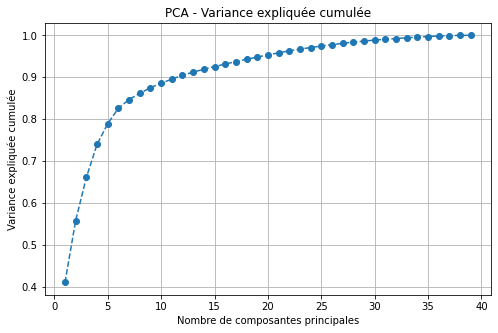

Nombre optimal de composantes pour 95% de variance: 20


,highest_market_value_in_eur,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),position_Attack,position_Defender,position_Goalkeeper,position_Midfield,foot_both,foot_left,foot_right,age,date_valuation,market_value_in_eur,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,17.034386,2,4,4,0,0,0,1,0,0,1,30,12,700000,4.338154,-0.081662,0.205776,0.603603,0.567716,-0.961643,0.542122,-1.027462,0.189135,1.184623,0.611192,-0.302171,-0.302857,-0.02650,0.362232,0.178488,0.300857,-0.265359,0.112960,0.206383
1,17.034386,2,4,4,0,0,0,1,0,0,1,30,12,1000000,4.338154,-0.081662,0.205776,0.603603,0.567716,-0.961643,0.542122,-1.027462,0.189135,1.184623,0.611192,-0.302171,-0.302857,-0.02650,0.362232,0.178488,0.300857,-0.265359,0.112960,0.206383
2,17.034386,2,4,4,0,0,0,1,0,0,1,30,12,2500000,4.338154,-0.081662,0.205776,0.603603,0.567716,-0.961643,0.542122,-1.027462,0.189135,1.184623,0.611192,-0.302171,-0.302857,-0.02650,0.362232,0.178488,0.300857,-0.265359,0.112960,0.206383
3,14.731801,1,3,3,0,1,0,0,0,0,1,36,12,2000000,2.405196,0.265622,-1.354926,-1.354307,1.043310,1.246237,1.495564,-0.470527,-0.603531,0.113545,-0.198255,0.358059,-1.161753,0.28443,0.493749,0.275715,-0.612139,-0.121479,0.030722,0.456833
4,14.731801,1,3,3,0,0,0,1,0,1,0,37,12,1000000,0.774813,-1.179433,0.275004,1.216578,-2.576668,0.026778,-0.420072,-0.481681,-0.511269,0.479068,-0.567956,-0.067989,0.150220,-0.52286,1.082645,0.254688,-0.276191,0.401022,0.018062,-0.596371
5,14.731801,1,3,3,0,0,0,1,0,1,0,37,12,1500000,0.774813,-1.179433,0.275004,1.216578,-2.576668,0.026778,-0.420072,-0.481681,-0.511269,0.479068,-0.567956,-0.067989,0.150220,-0.52286,1.082645,0.254688,-0.276191,0.401022,0.018062,-0.596371
6,14.731801,1,3,3,0,0,0,1,0,1,0,37,12,2500000,0.774813,-1.179433,0.275004,1.216578,-2.576668,0.026778,-0.420072,-0.481681,-0.511269,0.479068,-0.567956,-0.067989,0.150220,-0.52286,1.082645,0.254688,-0.276191,0.401022,0.018062,-0.596371
7,14.731801,1,3,2,1,0,0,0,0,0,1,40,12,1500000,-0.313761,-1.915400,1.428786,3.379066,-2.957698,-0.384470,0.438132,-0.329954,1.042304,0.925624,-1.619041,-0.281907,-0.310598,0.05692,0.175745,0.600152,0.986931,-0.344141,0.260524,0.496842
8,14.731801,1,3,2,1,0,0,0,0,0,1,40,12,2000000,-0.313761,-1.915400,1.428786,3.379066,-2.957698,-0.384470,0.438132,-0.329954,1.042304,0.925624,-1.619041,-0.281907,-0.310598,0.05692,0.175745,0.600152,0.986931,-0.344141,0.260524,0.496842
9,15.201805,1,4,4,0,0,0,1,0,0,1,33,12,800000,4.304767,0.969556,0.269977,-0.652558,0.329919,0.613218,0.951923,0.893639,-1.243359,-0.585938,-0.507206,0.072340,0.894025,0.55376,-0.159205,0.134478,0.283739,0.086593,-0.034655,0.124063


In [216]:
pca = PCA()
pca_result = pca.fit(df_standardized[columns_to_standardize])

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('PCA - Variance expliquée cumulée')
plt.grid()
plt.show()

n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Nombre optimal de composantes pour 95% de variance: {n_components}")

pca_optimal = PCA(n_components=n_components)
pca_transformed_data = pca_optimal.fit_transform(df_standardized[columns_to_standardize])

pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(pca_transformed_data, columns=pca_columns, index=df_selected.index)

df_selected = pd.concat([df_standardized.drop(columns=columns_to_standardize), pca_df], axis=1)

df_selected.head(10)



# Model training and  evaluation

In [219]:
df_selected = df_selected.dropna() 

In [220]:
def evaluate_models(df_selected):
    
    X = df_selected.drop(columns=['market_value_in_eur'])  
    y = df_selected['market_value_in_eur']  # Cible

    X.fillna(0, inplace=True)
    
    train_data = df_selected[df_selected['date_valuation'] > 0]
    test_data = df_selected[df_selected['date_valuation'] == 0]

    X_train = train_data.drop(columns=['market_value_in_eur'])
    y_train = train_data['market_value_in_eur']
    X_test = test_data.drop(columns=['market_value_in_eur'])
    y_test = test_data['market_value_in_eur']
    
    results = {}
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    y_pred_rf = rf_model.predict(X_test)
    
    print(f"Nombre de prédictions effectuées : {len(y_pred_rf)}")
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    cv_scores_rf = cross_val_score(rf_model, X, y, cv=10, scoring='r2')
    results['Random Forest'] = {
        'MSE': mse_rf,
        'R2': r2_rf,
        'Cross-Validation R2 Mean': cv_scores_rf.mean(),
        'Cross-Validation R2 Scores': cv_scores_rf.tolist(),
        'Predictions Count': len(y_pred_rf)
    }

    feature_importances_rf = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    knn_model = KNeighborsRegressor(n_neighbors=50)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    r2_knn = r2_score(y_test, y_pred_knn)
    cv_scores_knn = cross_val_score(knn_model, X, y, cv=5, scoring='r2')

    results['KNN'] = {
        'MSE': mse_knn,
        'R2': r2_knn,
        'Cross-Validation R2 Mean': cv_scores_knn.mean(),
        'Cross-Validation R2 Scores': cv_scores_knn.tolist()
    }

    perm_importance_knn = permutation_importance(knn_model, X_test, y_test, scoring='r2')
    feature_importances_knn = pd.DataFrame({
        'Feature': X.columns,
        'Importance': perm_importance_knn.importances_mean
    }).sort_values(by='Importance', ascending=False)

    for model_name, metrics in results.items():
        print(f"\n### {model_name} ###")
        print(f"Mean Squared Error (MSE): {metrics['MSE']}")
        print(f"R-squared: {metrics['R2']}")
        print(f"Cross-Validation R2 Mean: {metrics['Cross-Validation R2 Mean']}")
        print(f"Cross-Validation R2 Scores: {metrics['Cross-Validation R2 Scores']}")

    print("\n### Feature Importance (Random Forest) ###")
    print(feature_importances_rf)

    print("\n### Feature Importance (KNN) ###")
    print(feature_importances_knn)

    return results, feature_importances_rf, feature_importances_knn, y_test, y_pred_rf, y_pred_knn

def visualize_results_rf(y_test, y_pred_rf):
   
    # Graphique 1 : Courbe valeurs prédites vs réelles (Random Forest)
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred_rf, alpha=0.6, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.title("Random Forest Predictions")
    plt.grid(True)
    plt.show()

    
    
def visualize_results_knn(y_test, y_pred_knn):
    
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred_knn, alpha=0.6, color="green")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.title("KNN Predictions")
    plt.grid(True)
    plt.show()



Nombre de prédictions effectuées : 4123

### Random Forest ###
Mean Squared Error (MSE): 72607222067297.64
R-squared: 0.8978080216887954
Cross-Validation R2 Mean: 0.7015072718810748
Cross-Validation R2 Scores: [0.14228177363090122, 0.8608010129187024, 0.678030743402231, 0.7064073090987597, 0.7374821289611128, 0.6748140347268814, 0.8684856729624096, 0.5896291602058996, 0.8778510575525669, 0.8792898253512822]

### KNN ###
Mean Squared Error (MSE): 255261826643281.6
R-squared: 0.6407284246761213
Cross-Validation R2 Mean: 0.5811584866847292
Cross-Validation R2 Scores: [0.42944285541064786, 0.538492039088794, 0.6309638350050417, 0.7424053379164346, 0.5644883660027279]

### Feature Importance (Random Forest) ###
                          Feature  Importance
0     highest_market_value_in_eur    0.629458
12                 date_valuation    0.167926
11                            age    0.056990
22                           PC10    0.029969
28                           PC16    0.020903
13      

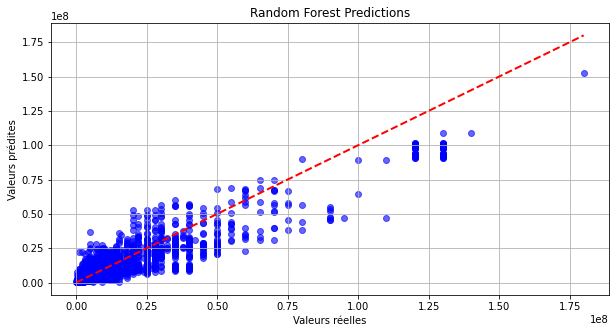

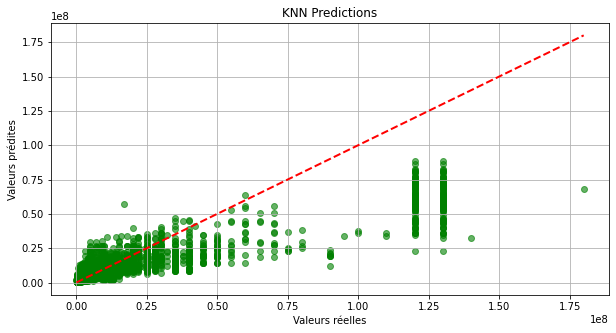

In [221]:
results, feature_importances_rf, feature_importances_knn, y_test, y_pred_rf, y_pred_knn = evaluate_models(df_selected)

visualize_results_rf(y_test, y_pred_rf)
visualize_results_knn(y_test, y_pred_knn)


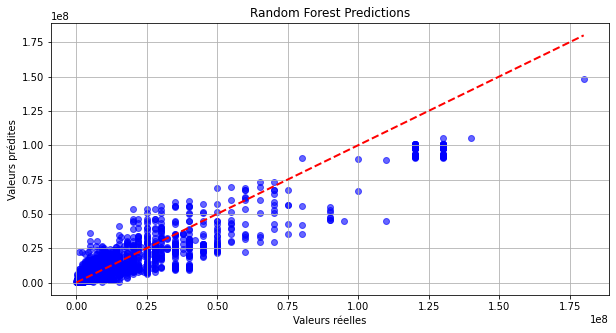

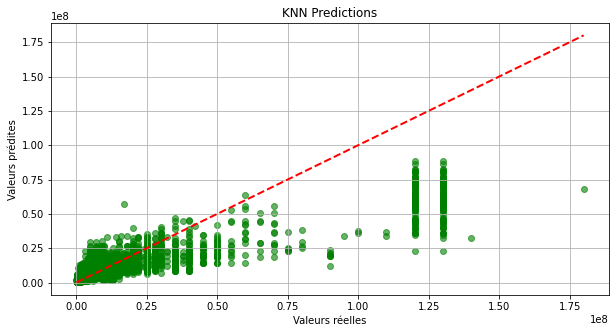

In [168]:
visualize_results_rf(y_test, y_pred_rf)
visualize_results_knn(y_test, y_pred_knn)
